Projekt
=======


Wprowadzenie
------------

Zbiór danych dotyczący ćwiczeń członków siłowni, który został utworzony na podstawie 973 próbek zebranych podczas sesji treningowych. Dane zawierają informacje demograficzne, fizjologiczne oraz szczegóły dotyczące rutyny treningowej użytkowników siłowni. Zbiór został najprawdopodobniej utworzony na siłowni lub centrum fitness poprzez ankietowanie, monitorowanie i rejestrowanie aktywności oraz parametrów zdrowotnych uczestników. Pytania badawcze będą dotyczyć m.in. zależności między poziomem doświadczenia a wynikami treningowymi, wpływu cech fizycznych na intensywność ćwiczeń, oraz analizy wzorców postępów i zdrowia użytkowników.

Czyszczenie i porządkowanie danych
----------------------------------


In [27]:
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('data/silownia_new.csv')

In [146]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,NaN,Male,88.3,1.71,180,157,60,1.69,1313,Yoga,12.6,3.5,4,3,NaN
1,46.0,Female,74.9,1.53,179,151,66,1.30,883,NaN,33.9,2.1,4,2,32.00
2,32.0,Female,68.1,1.66,167,122,54,1.11,677,Cardio,33.4,2.3,4,2,NaN
3,25.0,Male,53.2,1.70,190,164,56,0.59,532,Strength,28.8,2.1,3,1,18.41
4,38.0,Male,46.1,1.79,188,158,68,0.64,556,Strength,29.2,2.8,3,1,14.39


In [4]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,873.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,823.000000
mean,38.626575,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.816549
std,12.273464,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.600485
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.105000
50%,39.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,23.940000
75%,50.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.450000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,47.720000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            873 non-null    float64
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    int64  
 9   Workout_Type                   823 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [6]:
df.isna().sum()

Age                              100
Gender                             0
Weight (kg)                        0
Height (m)                         0
Max_BPM                            0
Avg_BPM                            0
Resting_BPM                        0
Session_Duration (hours)           0
Calories_Burned                    0
Workout_Type                     150
Fat_Percentage                     0
Water_Intake (liters)              0
Workout_Frequency (days/week)      0
Experience_Level                   0
BMI                              150
dtype: int64

Zbiór danych jest wybrakowany w 150 rekordów wartości BMI. Jednocześnie dostępne mamy dla wszystkich obserwacji wartości składające się na wzór BMI. Dzięki temu mozemy w prosty sposób dokonać imptutacji deterministycznej uzywając wzoru:
$$
BMI = \frac{\text{waga w kg}}{\text{wzrost do kwadratu}}
$$


In [7]:
mask_missing_bmi = df["BMI"].isna()
df.loc[mask_missing_bmi, 'BMI'] = (
    df.loc[mask_missing_bmi, 'Weight (kg)'] /
    (df.loc[mask_missing_bmi, 'Height (m)'] ** 2)
)

<Axes: >

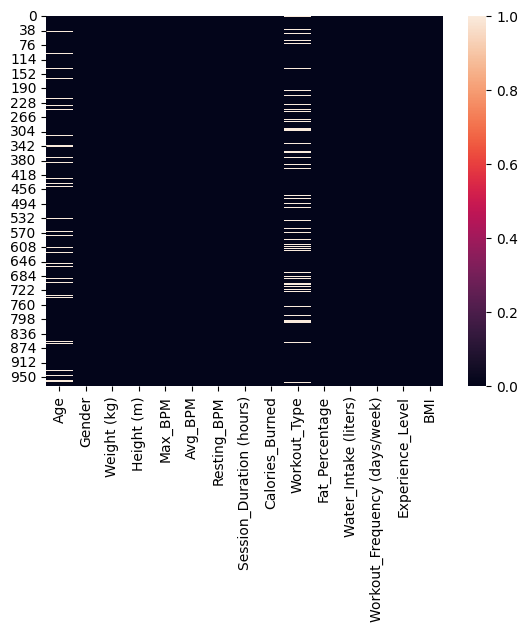

In [8]:
sns.heatmap(df.isna())

<Axes: >

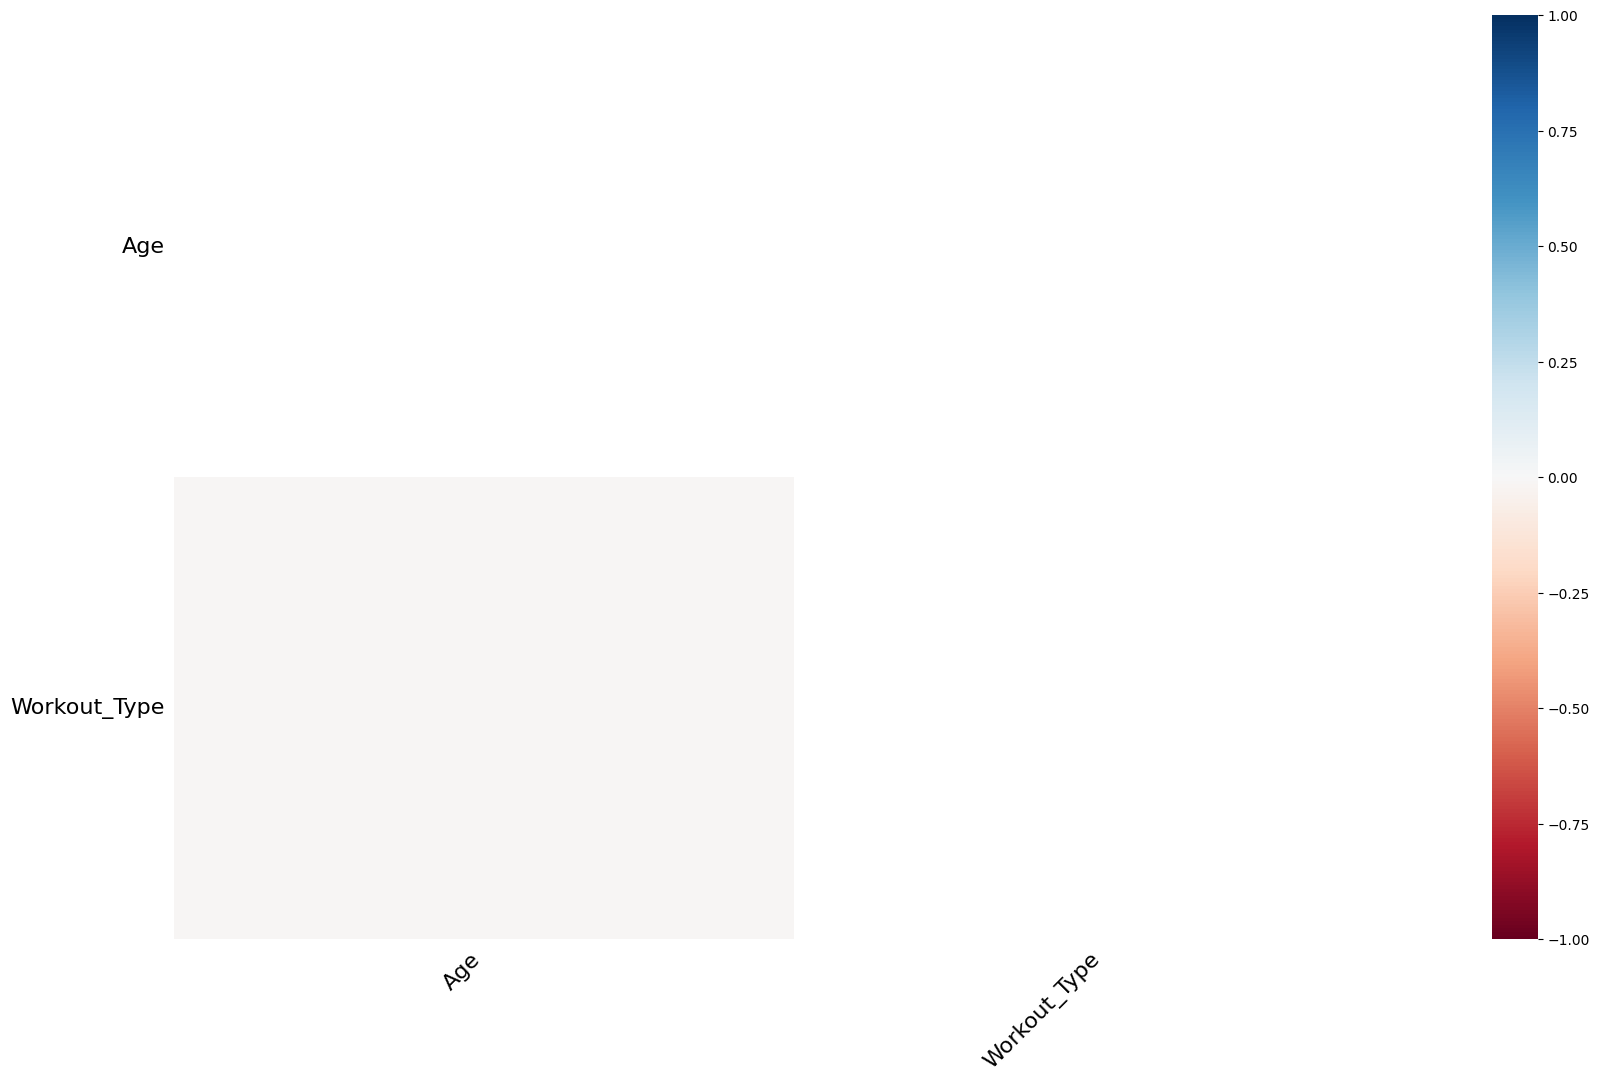

In [9]:
msno.heatmap(df)

<Axes: >

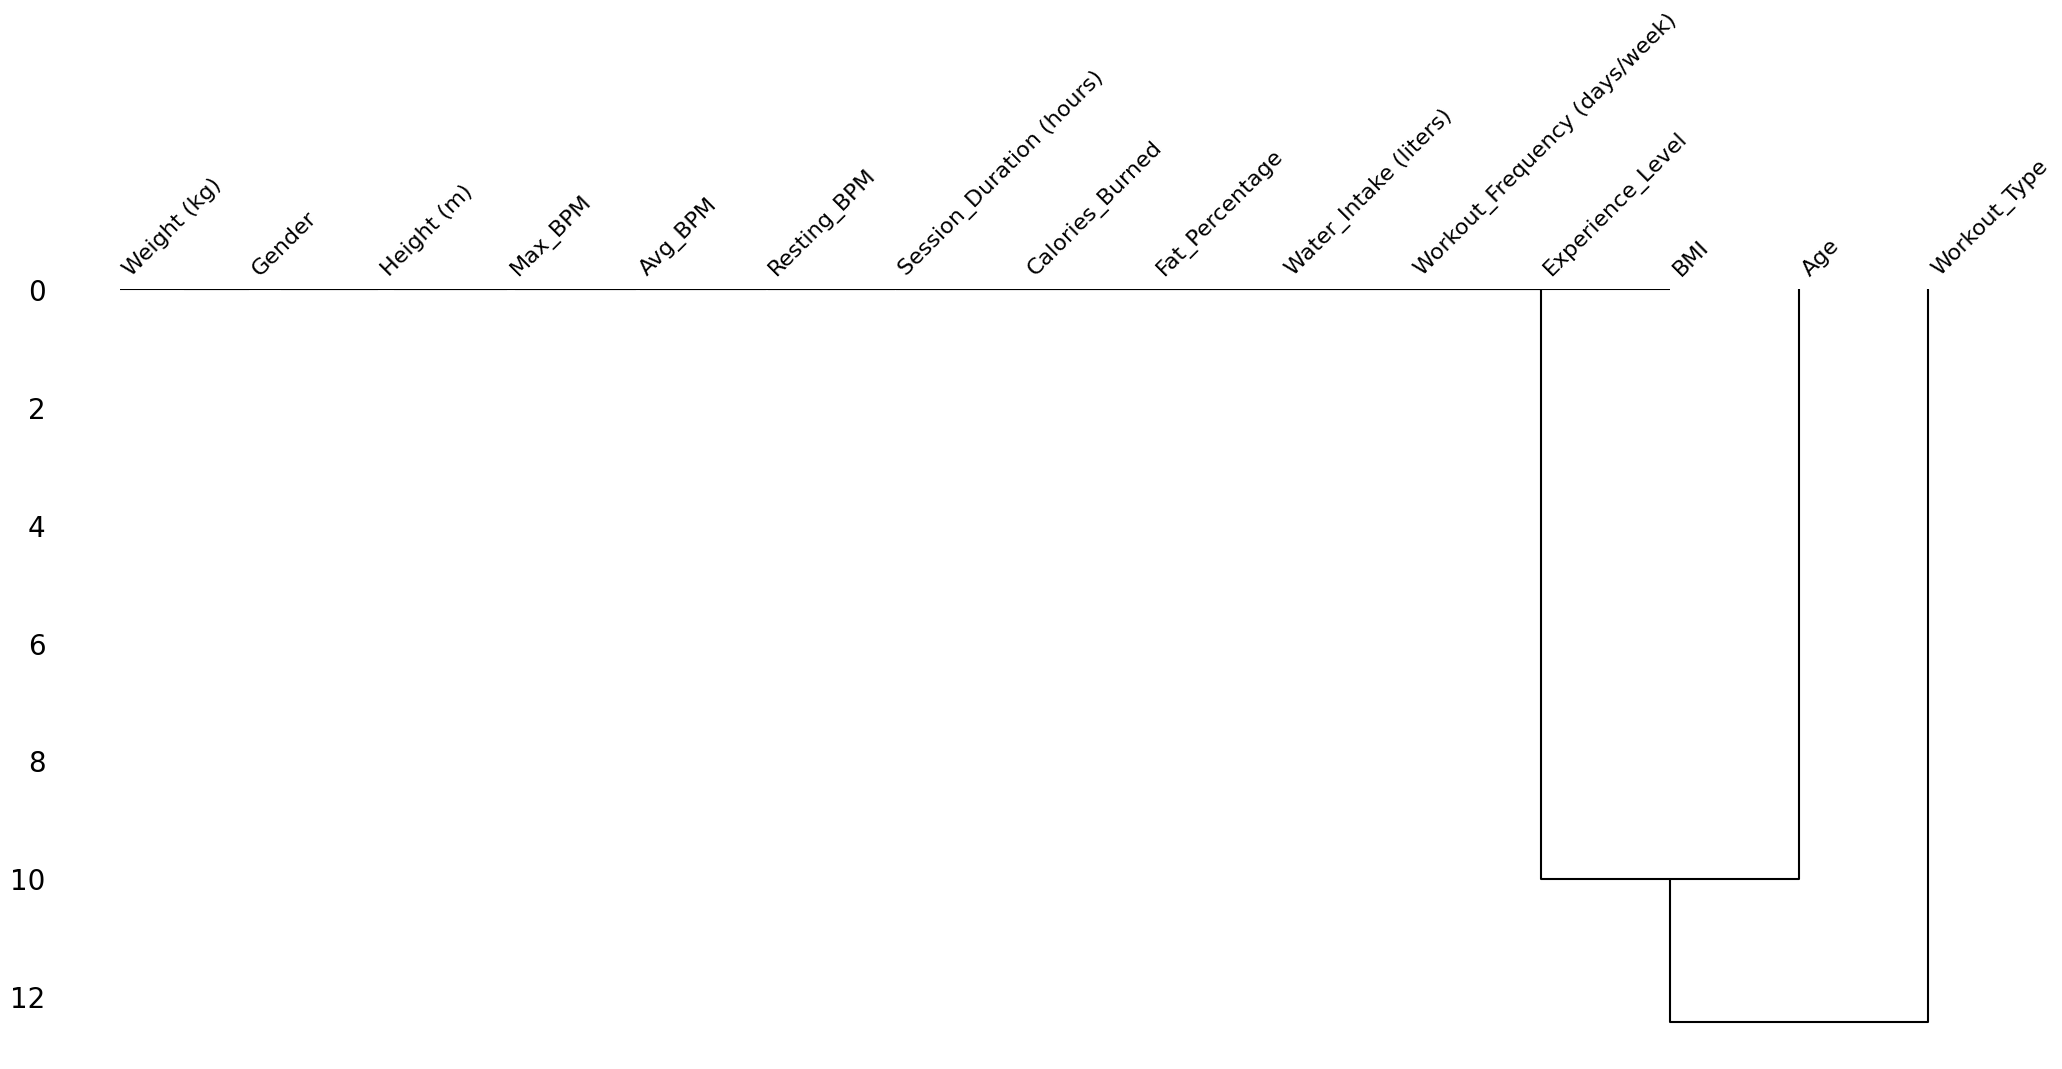

In [10]:
msno.dendrogram(df)

Brak zależności pomiędzy brakującymi danymi w tych samych wierszach

In [11]:
df.groupby('Gender')['Age'].apply(lambda x: x.isnull().sum())

Gender
Female    41
Male      59
Name: Age, dtype: int64

In [12]:
df[df['Age'].isna()]['Weight (kg)'].mean()

np.float64(75.01299999999999)

In [13]:
df[~df['Age'].isna()]['Weight (kg)'].mean()

np.float64(73.72199312714777)

Braki zupelnie losowe (MCAR), stanowią ok. 15%, więc nie będą usuwane, a imputowane

<Axes: >

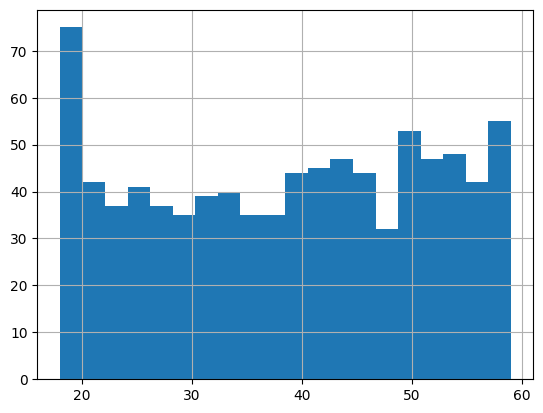

In [14]:
df['Age'].hist(bins=20)

Rozkład wieku nie jest idealnie symetryczny - widoczny jest spory pik po lewej stronie histogramu (młodzi użytkownicy siłowni). Średnia może być zawyżona przez osoby starsze, więc imputacja medianą lepiej odzwierciedli typowego użytkownika

In [15]:
df['Age_imputed'] = df['Age'].fillna(df['Age'].median())

In [17]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Workout_Type'], df['Gender'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi2 test p-value: {p}")

Chi2 test p-value: 0.5523515099225926


In [18]:
from scipy.stats import f_oneway

for col in df.select_dtypes(include='number').columns:
    groups = [group[col].dropna() for name, group in df.groupby('Workout_Type')]
    if len(groups) > 1:
        stat, p = f_oneway(*groups)
        print(f"{col}: p-value = {p:.4f}")


Age: p-value = 0.7154
Weight (kg): p-value = 0.6959
Height (m): p-value = 0.5577
Max_BPM: p-value = 0.7012
Avg_BPM: p-value = 0.8644
Resting_BPM: p-value = 0.6219
Session_Duration (hours): p-value = 0.1248
Calories_Burned: p-value = 0.2411
Fat_Percentage: p-value = 0.0824
Water_Intake (liters): p-value = 0.4088
Workout_Frequency (days/week): p-value = 0.4954
Experience_Level: p-value = 0.1320
BMI: p-value = 0.7003
Age_imputed: p-value = 0.7217


<Axes: >

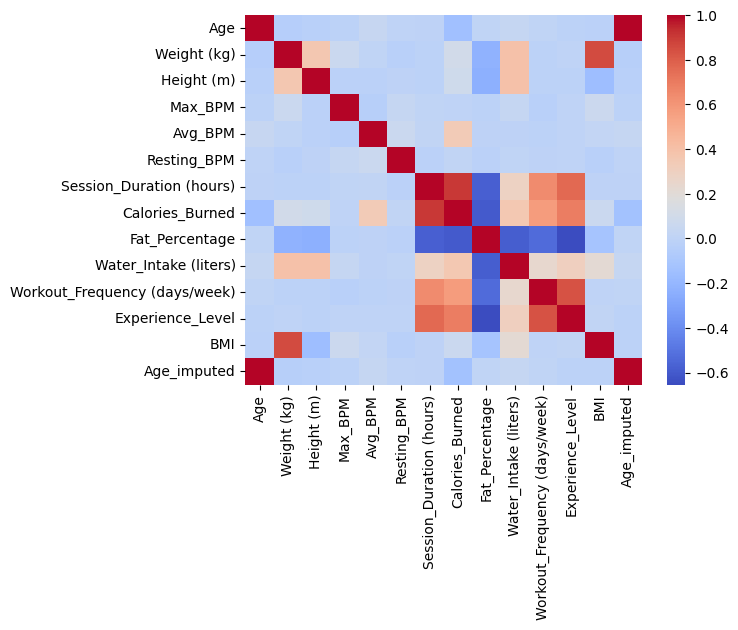

In [19]:
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm')

Brak istotnych statystycznie zależności między Workout Type, a innymi kolumnami. Liczne braki, uzupelnienie najczęstszą wartością nie ma sensu, dlatego użyte zostanie oznaczenie "Unknown".

In [20]:
df['Workout_Type'] = df['Workout_Type'].fillna('Unknown')

In [21]:
df['Workout_Type'].value_counts()

Workout_Type
Cardio      220
Strength    219
Yoga        200
HIIT        184
Unknown     150
Name: count, dtype: int64

In [33]:
tolerance = 0.01

def check_rules(df):
    rules = {
        "Age > 0": df["Age_imputed"] > 0,
        "Weight > 0": df["Weight (kg)"] > 0,
        "Height > 0": df["Height (m)"] > 0,
        "Max_BPM > 0": df["Max_BPM"] > 0,
        "Max_BPM < 220": df["Max_BPM"] < 220,
        "Avg_BPM > 0": df["Avg_BPM"] > 0,
        "Resting_BPM > 0": df["Resting_BPM"] > 0,
        "Fat_Percentage > 0": df["Fat_Percentage"] > 0,
        "Fat_Percentage < 100": df["Fat_Percentage"] < 100,
        "Workout_Frequency (days/week) >= 0": df["Workout_Frequency (days/week)"] >= 0,
        "Workout_Frequency (days/week) <= 7": df["Workout_Frequency (days/week)"] <= 7,
        "Calories_Burned >= 0": df["Calories_Burned"] >= 0,

        "Age < 130": df["Age_imputed"] < 130,
        "Weight < 640": df["Weight (kg)"] < 640,
        "Height < 2.3": df["Height (m)"] < 2.3,

        "Max_BPM >= Avg_BPM >= Resting_BPM": (df["Max_BPM"] >= df["Avg_BPM"]) & (df["Avg_BPM"] >= df["Resting_BPM"]),
        "BMI = Weight / Height ** 2": np.abs(df["BMI"] - (df["Weight (kg)"] / (df["Height (m)"] ** 2))) < tolerance
    }
    return rules

rules = check_rules(df)

for rule, result in rules.items():
    print(f"{rule}: {result.all()}")

Age > 0: True
Weight > 0: True
Height > 0: True
Max_BPM > 0: True
Max_BPM < 220: True
Avg_BPM > 0: True
Resting_BPM > 0: True
Fat_Percentage > 0: True
Fat_Percentage < 100: True
Workout_Frequency (days/week) >= 0: True
Workout_Frequency (days/week) <= 7: True
Calories_Burned >= 0: True
Age < 130: True
Weight < 640: True
Height < 2.3: True
Max_BPM >= Avg_BPM >= Resting_BPM: False
BMI = Weight / Height ** 2: True


In [34]:
violations = {rule: ~result for rule, result in rules.items()}

summary = {rule: result.sum() for rule, result in violations.items()}

print("Summary of Violations:")
for rule, count in summary.items():
    print(f"{rule}: {count} violations")

Summary of Violations:
Age > 0: 0 violations
Weight > 0: 0 violations
Height > 0: 0 violations
Max_BPM > 0: 0 violations
Max_BPM < 220: 0 violations
Avg_BPM > 0: 0 violations
Resting_BPM > 0: 0 violations
Fat_Percentage > 0: 0 violations
Fat_Percentage < 100: 0 violations
Workout_Frequency (days/week) >= 0: 0 violations
Workout_Frequency (days/week) <= 7: 0 violations
Calories_Burned >= 0: 0 violations
Age < 130: 0 violations
Weight < 640: 0 violations
Height < 2.3: 0 violations
Max_BPM >= Avg_BPM >= Resting_BPM: 23 violations
BMI = Weight / Height ** 2: 0 violations


In [37]:
invalid_rows = df[~((df["Max_BPM"] >= df["Avg_BPM"]) & (df["Avg_BPM"] >= df["Resting_BPM"]))]
invalid_rows

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Age_imputed
16,19.0,Female,64.0,1.53,166,167,58,1.33,1111,HIIT,29.8,2.3,3,2,27.340000,19.0
46,24.0,Male,54.7,1.74,160,167,53,0.84,772,Yoga,22.9,3.6,3,1,18.067116,24.0
56,59.0,Female,65.5,1.52,161,162,61,1.40,1021,Yoga,31.2,2.1,3,2,28.350000,59.0
95,59.0,Female,54.6,1.57,164,169,64,0.58,441,Cardio,29.2,2.3,3,1,22.150000,59.0
106,41.0,Male,71.7,1.96,162,168,51,0.51,424,Yoga,27.3,2.5,2,1,18.660000,41.0
230,28.0,Male,76.3,1.62,161,162,70,1.16,1034,Strength,20.1,2.3,3,2,29.070000,28.0
310,52.0,Female,64.9,1.51,164,165,68,1.83,1359,HIIT,18.2,2.7,4,3,28.460000,52.0
326,48.0,Male,69.0,1.74,160,167,58,1.48,1223,HIIT,30.0,2.3,3,2,22.790000,48.0
356,31.0,Female,62.5,1.62,168,169,74,1.56,1318,Unknown,16.5,2.7,4,3,23.814967,31.0
365,39.0,Female,60.6,1.65,162,167,63,0.92,768,HIIT,27.6,1.7,3,1,22.260000,39.0


Dataset zawiera błędne dane dotyczące akcji serca użytkowników, gdyż średnia ilość uderzeń na minutę (Avg_BPM) nie może być wyższa od maksymalnej ilości uderzeń (Max_BPM). TO BE CONTINUED...

In [23]:
df.duplicated().sum()

np.int64(0)

W zbiorze nie znaleziono duplikatów.

Wizualizacje
---

Analiza opisowa
---

Wnioski
---